Importeringar för Notebooken

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Beskrivande analys

Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).

Simulering kopplad till caset (använd numpy.random + seed)

Beräkna andelen personer i datasetet som har sjukdomen.
Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
Jämför den simulerade andelen med den verkliga andelen i datasetet.

Konfidensintervall

Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).

Hypotesprövning

Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
Förklara kort resultatet i en markdown-ruta.

Förbereder data

In [2]:
#Read

#do I even need this whole section since we are writing in the same page? 
REQUIRED = ["id","age","sex","height","weight","systolic_bp","cholesterol","smoker","disease"]

def load_data(path: str) -> pd.DataFrame:
    """
    Läser CSV 
    """
    df = pd.read_csv(path)
    missing = [c for c in REQUIRED if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns: {missing}")
    return df

df = load_data("C:/Users/Mauro/Desktop/Del 1/Health-study-project/health_study_dataset.csv")


def coerce_numeric(df: pd.DataFrame) -> pd.DataFrame: #ensuring data is correctly classed, following "Mini-EDA med Python från Joakim"
    """
    Ensures numerical columns are numerical category
    """
    out = df.copy()
    for c in {"id","age","height","weight","systolic_bp","cholesterol", "disease"}:
        out[c] = pd.to_numeric(out[c], errors="coerce")
    return out


df = df.dropna(subset=["id","age","sex","height","weight","systolic_bp","cholesterol","smoker","disease"]).copy()
#df = df[df["id","age","sex","height","weight","systolic_bp","cholesterol","smoker","disease"]>0].copy()
#behövs inte

df.info()

#Clean

#Visualize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


In [3]:
#Metrics
#Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.

columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
averages = df[columns].mean()
medians = df[columns].median()
min = df[columns].min()
max = df[columns].max()


summary = pd.DataFrame({
    "Average": averages,
    "Median": medians,
    "Minimum": min,
    "Maximum": max})

print(summary)

                Average  Median  Minimum  Maximum
age           49.426250   50.00     18.0    90.00
weight        73.413000   73.20     33.7   114.40
height       171.849250  171.35    144.4   200.40
systolic_bp  149.178625  149.40    106.8   185.90
cholesterol    4.929150    4.97      2.5     7.88


C:\Users\Mauro\AppData\Local\Temp\ipykernel_18036\2825007132.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(grouped_weight, labels=df["sex"].unique())


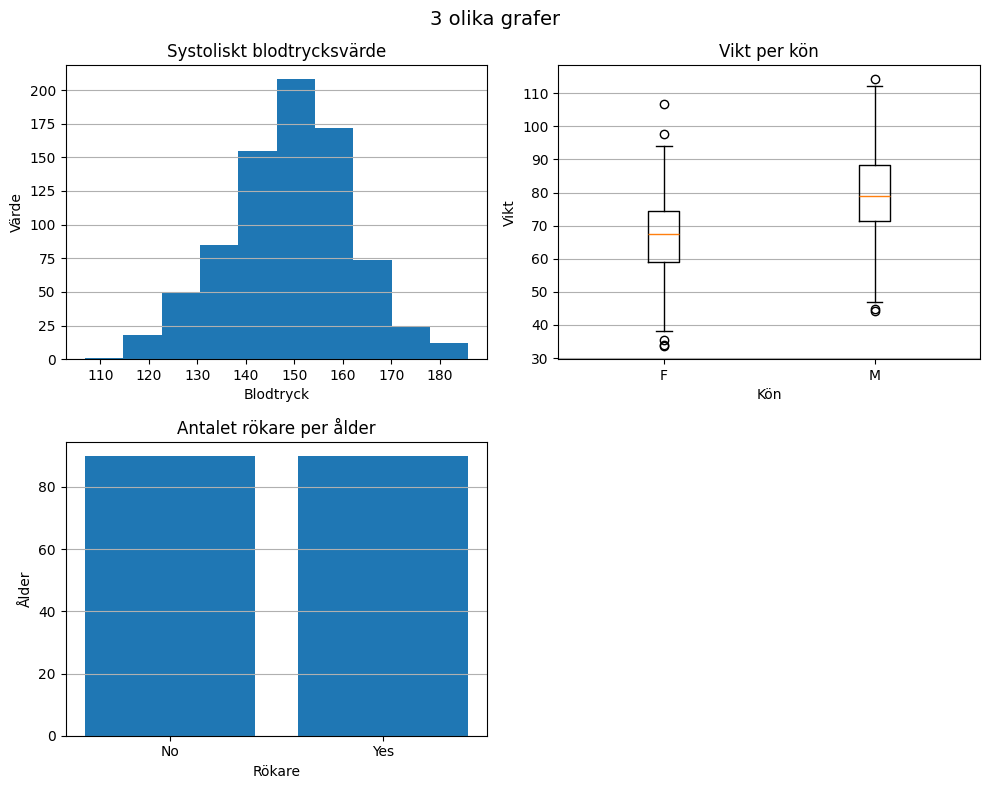

In [4]:
#Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare)
#histogram över blodtryck

fig, axes = plt.subplots(2,2, figsize=(10,8), sharex=False, sharey=False)#skapade sammansatta grafer med hjälp av Joakims videos om "Intro till Matplotlib" + "Fördjupning i matplotlib"

axes[0,0].hist(df.systolic_bp,bins=10)
axes[0,0].set_title("Systoliskt blodtrycksvärde")
axes[0,0].set_xlabel("Blodtryck")
axes[0,0].set_ylabel("Värde")
axes[0,0].grid(True, axis="y")

# boxplot över vikt per kön

grouped_weight = [df[df.sex==s]["weight"]for s in df["sex"].unique()]
axes[0,1].boxplot(grouped_weight, labels=df["sex"].unique())
axes[0,1].set_title("Vikt per kön")
axes[0,1].set_xlabel("Kön")
axes[0,1].set_ylabel("Vikt")
axes[0,1].grid(True, axis="y")

# stapeldiagram över andelen rökare

axes[1,0].bar(df.smoker,df.age)
axes[1,0].set_title("Antalet rökare per ålder")
axes[1,0].set_xlabel("Rökare")
axes[1,0].set_ylabel("Ålder")
axes[1,0].grid(True, axis="y")

axes[1,1].axis("off")

fig.suptitle("3 olika grafer", fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
#Simulering kopplad till caset (använd numpy.random + seed)

#Beräkna andelen personer i datasetet som har sjukdomen.


def sjuka_människor(df: pd.DataFrame) -> int:
    sick_people = (df["disease"] == 1).sum()
    print(f"Antal sjuka människor: {sick_people}")
    return sick_people    

sjuka_människor(df) #tillkallar funktionen

print(df["disease"].value_counts()) #ville jämföra med annat sätt för att se om jag fick rätt svar innan


#Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.

sannolikhet_sjuk = np.mean(df["disease"]) # räkna ut sannolikheten för sjukdom

np.random.seed(42) #använder random.seed så att samma startvärde används vid den slumpmässiga generatorn, från Joakims  "Konfidensintervall" video
simulerade_värden = np.random.choice([0, 1], size=1000, p = [1-sannolikhet_sjuk, sannolikhet_sjuk]) # använder choice eftersom detta är binär lista istället för normalfördelade värden. La även in "p" för parametrar i sannolikhet

pd.Series(simulerade_värden).describe()

#Jämför den simulerade andelen med den verkliga andelen i datasetet.

def sample_mean(n): 
    return np.mean(np.random.choice(simulerade_värden, size=n, replace=False))

R = 2000



Antal sjuka människor: 47
disease
0    753
1     47
Name: count, dtype: int64


In [ ]:
#Konfidensintervall
#Beräkna ett konfidensintervall för medelvärdet av systolic_bp 
# (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).

#Uträkning av konfidentintervall med normalapproximation med hjälp av "Konfidensintervall" video från Joakim samt https://www.geeksforgeeks.org/dsa/confidence-interval/
bp_medelvärdet = np.mean(df["systolic_bp"]) #Räkna ut medelvärdet/true mean av systolic_bp för jämförelse med stickprovet
bp_medelvärdet

n = 100
x = np.random.choice(df["systolic_bp"], size=n, replace=True) #utför 100 stickprov från systolic_bp värden, o samma värde kan väljas flera gånger med replace = True

mean_x = float(np.mean(x)) # medelvärde av systolic bp i stickprovet
s = float(np.std(x, ddof= 1)) # stickprovets standardavvikelse
se = s/np.sqrt(n)# standard error = hur mycket stickprovets medelvärde kan variera från det sanna medelvärdet.
mean_x,s,n,se

from math import sqrt

def ci_mean_normal(x, confidence=0.95):
    """
    95%-CI för medel med normal-approximation:
    medel +/- 1.96*(s/ sqrt(n))
    """
    x = np.asarray (x, dtype=float)
    mean_x = float(np.mean(x))
    s =float(np.std(x, ddof = 1))
    n = len(x)

    z_critical = 1.96 # z-värdet för 95% CI
    half_width = z_critical * s/ sqrt(n) # är halva bredden på intervallet.
    lo, hi = mean_x - half_width, mean_x + half_width # lo hi = Gränser för konfidensintervalle
    return lo, hi, mean_x, s, n

lo, hi, mean_x, s, n = ci_mean_normal(x)
(lo,hi), mean_x, s, n, bp_medelvärdet


((143.32261049187508, 148.6513895081249),
 145.987,
 13.593824021045423,
 100,
 np.float64(149.178625))

In [ ]:
# konfidenstintervall med Bootstrap metoden med hjälp av "Konfidensintervall" video från Joakim 

def ci_mean_bootstrap(x, B=5000, confidence=0.95): #B är antalet omdragningar stickprov
    x = np.asarray(x, dtype=float) # ändrar x till float array för att kunna ta ut procentiler mm 
    n = len(x)
    boot_means = np.empty(B) # Skapar en tom array med plats för  bootstrap-medelvärden.
    for b in range(B):
        boot_sample = np.random.choice(x, size=n, replace=True)
        boot_means[b] = np.mean(boot_sample)

    alpha = (1 - confidence) / 2 # Beräknar hur mycket som ska ligga utanför konfidensintervallet
    lo, hi, np.percentile(boot_means, [100*alpha, 100*(1-alpha)])
    return float(lo), float(hi), float(np.mean(x))

blo, bhi, bmean = ci_mean_bootstrap(x, B=3000)
(blo, bhi), bmean, bp_medelvärdet


((143.32261049187508, 148.6513895081249), 145.987, np.float64(149.178625))

In [8]:
#Hypotesprövning

#Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
#Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
#Förklara kort resultatet i en markdown-ruta.